In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

In [48]:
df= pd.read_csv(r'C:\Users\venka\Desktop\COURSE\CourseWork\Fall2020\CSP554-BigData\Project\BOARD-GAME-REVIEW-PREDICTION-master\\games.csv')

In [49]:
df.head()

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,average_rating,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.33774,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.28798,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.28994,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.20407,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.14261,8.04524,44362,795,861,5414,9173,5213,3.2943


In [50]:
df.shape

(81312, 20)

In [51]:
df=df[df["users_rated"]> 0]

In [52]:
df.shape

(56932, 20)

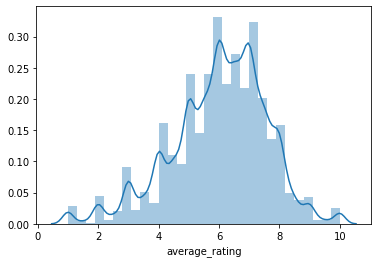

In [53]:
sns.distplot(df['average_rating'],bins=30)

In [54]:
df.isnull().sum()

id                       0
type                     0
name                    36
yearpublished            2
minplayers               2
maxplayers               2
playingtime              2
minplaytime              2
maxplaytime              2
minage                   2
users_rated              0
average_rating           0
bayes_average_rating     0
total_owners             0
total_traders            0
total_wanters            0
total_wishers            0
total_comments           0
total_weights            0
average_weight           0
dtype: int64

In [55]:
df=df.dropna(axis=0)

In [56]:
df.shape

(56894, 20)

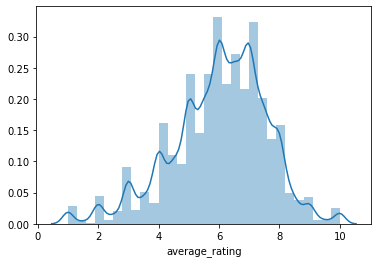

In [57]:
sns.distplot(df['average_rating'],bins=30)

In [59]:
df.isnull().sum()

id                      0
type                    0
name                    0
yearpublished           0
minplayers              0
maxplayers              0
playingtime             0
minplaytime             0
maxplaytime             0
minage                  0
users_rated             0
average_rating          0
bayes_average_rating    0
total_owners            0
total_traders           0
total_wanters           0
total_wishers           0
total_comments          0
total_weights           0
average_weight          0
dtype: int64

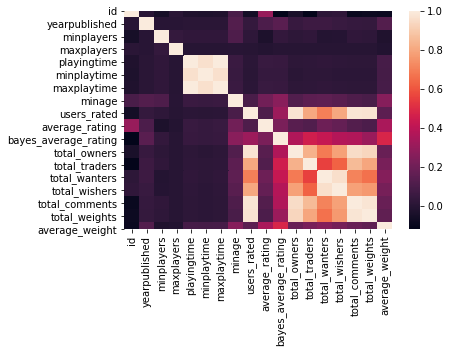

In [61]:
sns.heatmap(df.corr())
plt.show()

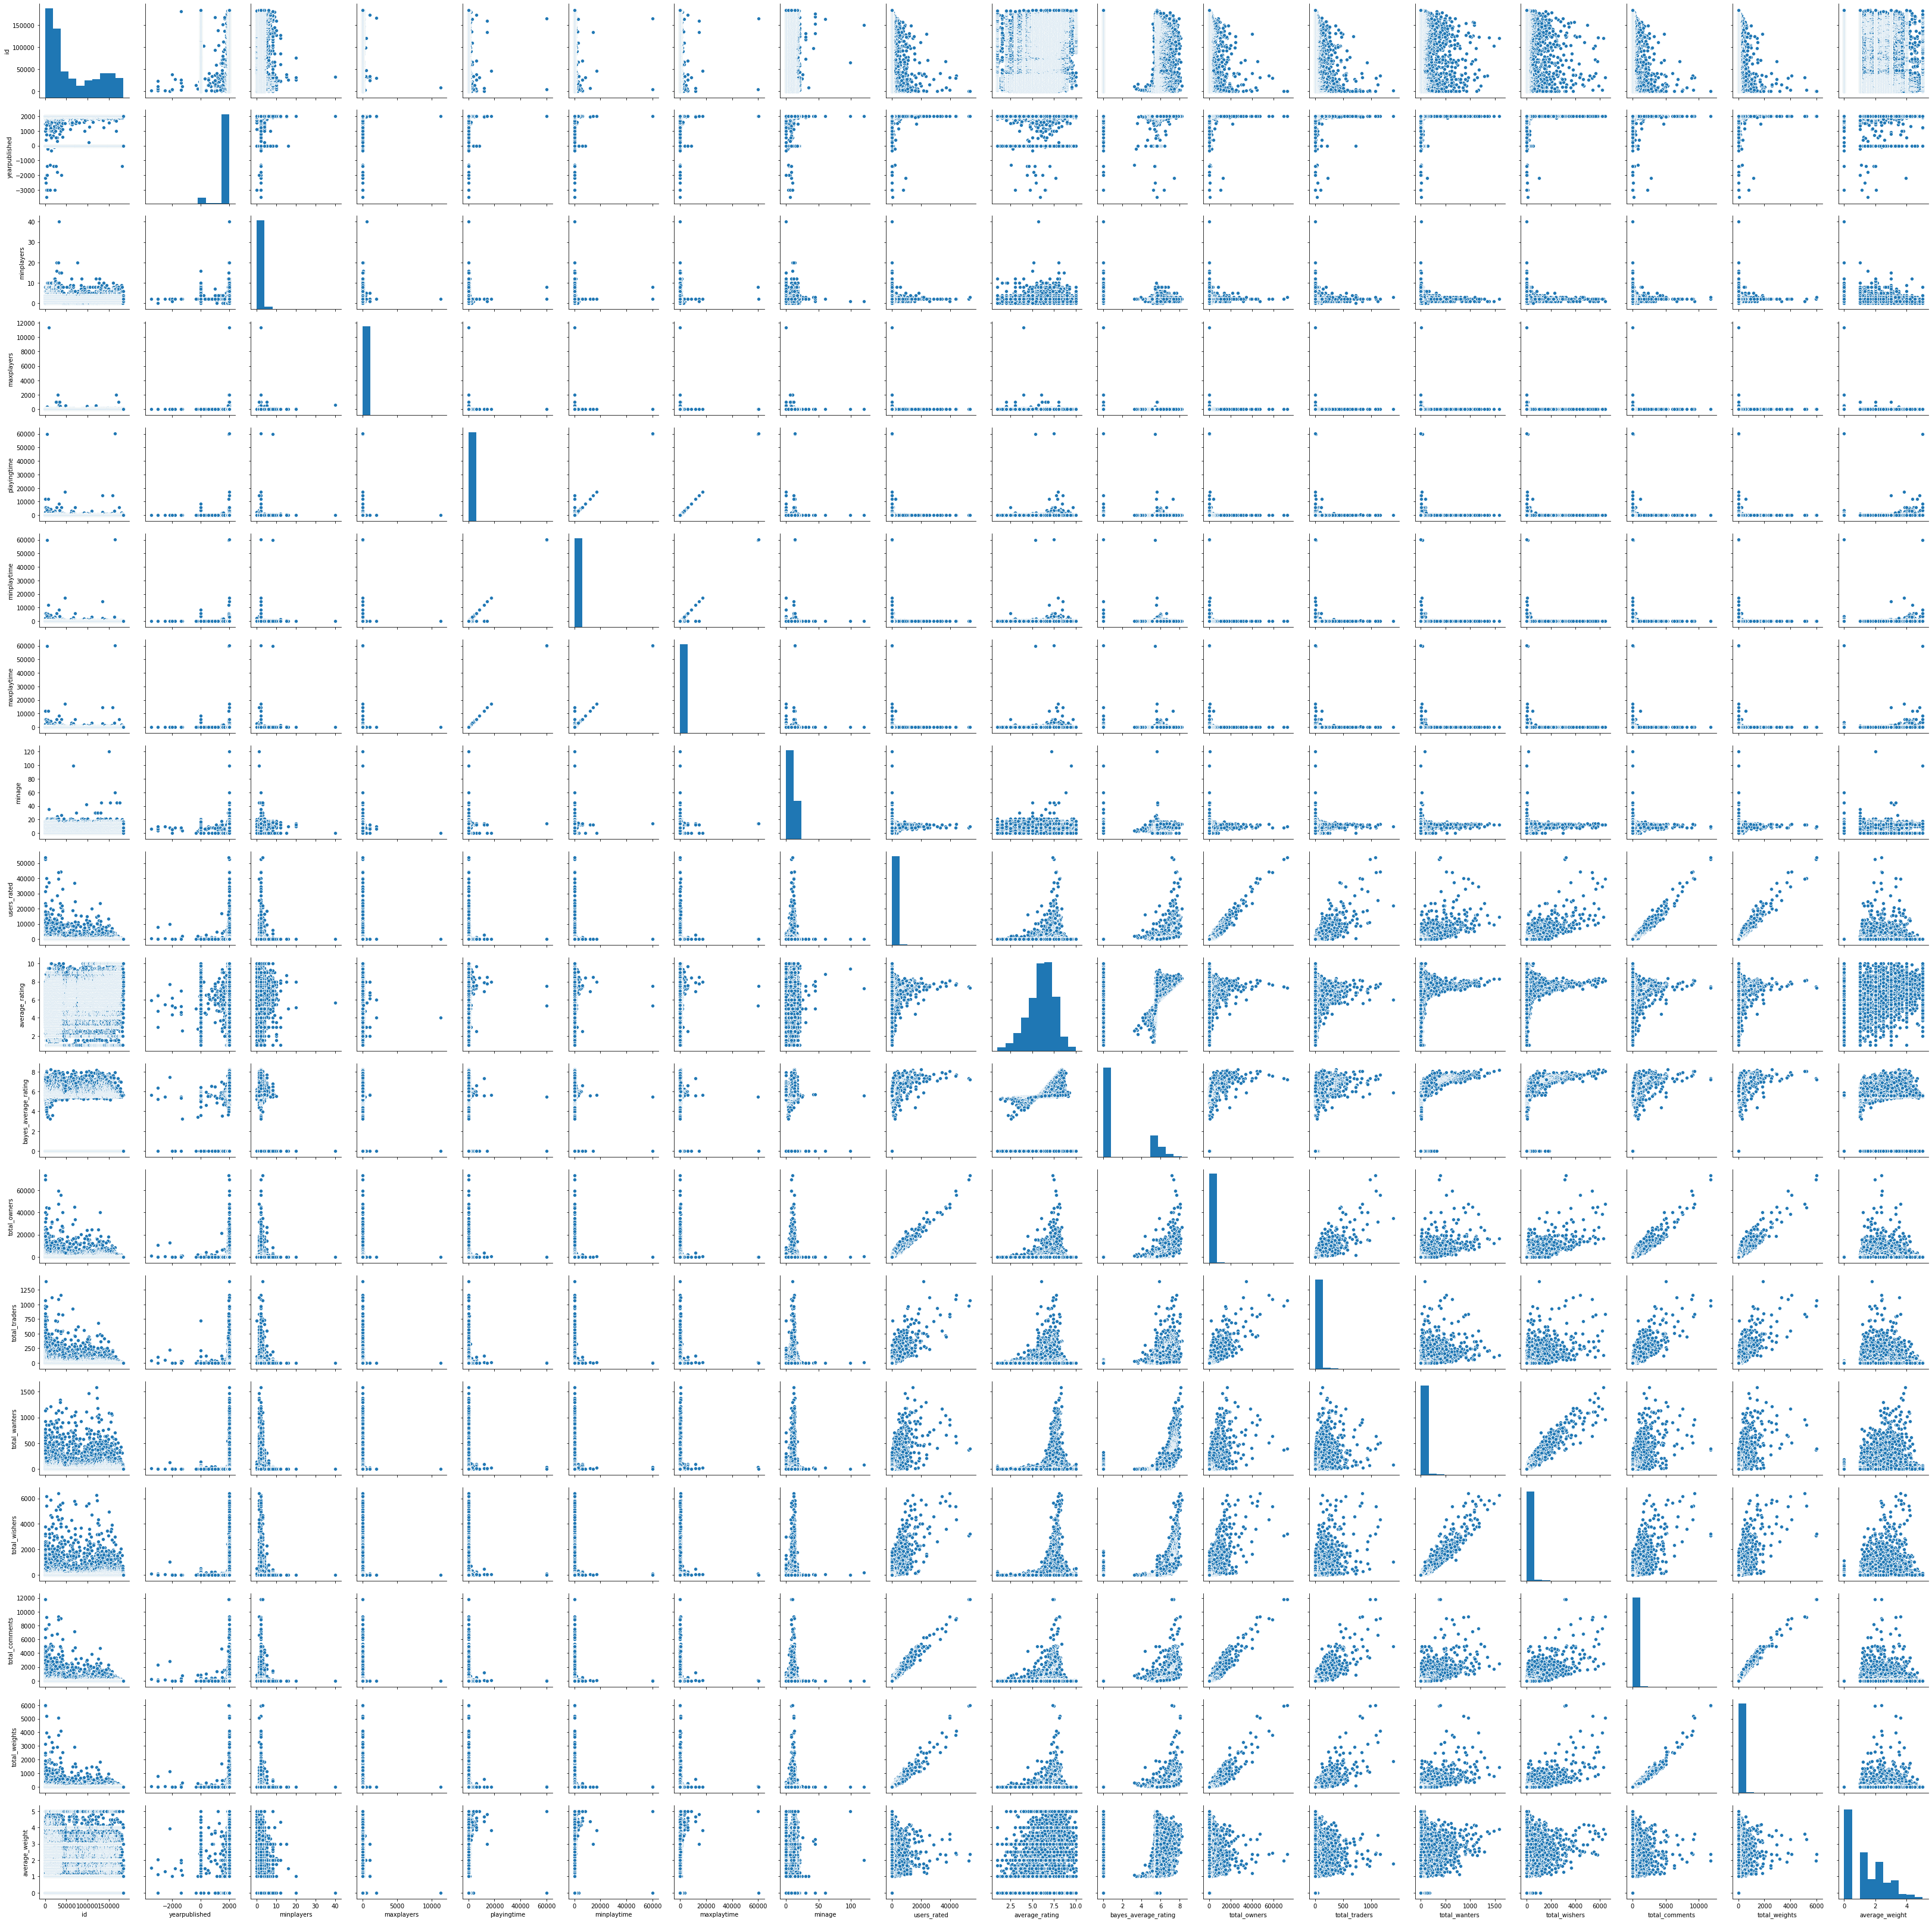

In [66]:
sns.pairplot(df)
plt.show()

In [62]:
y=df['average_rating']

In [63]:
y.head()

0    8.33774
1    8.28798
2    8.28994
3    8.20407
4    8.14261
Name: average_rating, dtype: float64

In [64]:
x=df
x.drop(columns='average_rating')

,id,type,name,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,bayes_average_rating,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
0,12333,boardgame,Twilight Struggle,2005.0,2.0,2.0,180.0,180.0,180.0,13.0,20113,8.22186,26647,372,1219,5865,5347,2562,3.4785
1,120677,boardgame,Terra Mystica,2012.0,2.0,5.0,150.0,60.0,150.0,12.0,14383,8.14232,16519,132,1586,6277,2526,1423,3.8939
2,102794,boardgame,Caverna: The Cave Farmers,2013.0,1.0,7.0,210.0,30.0,210.0,12.0,9262,8.06886,12230,99,1476,5600,1700,777,3.7761
3,25613,boardgame,Through the Ages: A Story of Civilization,2006.0,2.0,4.0,240.0,240.0,240.0,12.0,13294,8.05804,14343,362,1084,5075,3378,1642,4.1590
4,3076,boardgame,Puerto Rico,2002.0,2.0,5.0,150.0,90.0,150.0,12.0,39883,8.04524,44362,795,861,5414,9173,5213,3.2943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81260,184187,boardgameexpansion,Rum & Bones: Skullkicker heroes,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,16,0,0,1,2,1,1.0000
81261,184189,boardgameexpansion,Rum & Bones: Luck Goddesses,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,19,0,0,1,2,1,1.0000
81263,184195,boardgameexpansion,Rum & Bones: Mercenary Tide Deck,2015.0,2.0,6.0,0.0,60.0,0.0,14.0,1,0.00000,22,0,0,0,2,1,1.0000
81278,184258,boardgame,Rocket Shogi,2012.0,2.0,2.0,0.0,10.0,0.0,8.0,1,0.00000,0,0,0,0,1,0,0.0000


In [13]:
x=x.drop(columns=["bayes_average_rating", "average_rating", "type","name", "id"])

In [14]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.8, random_state=42)

In [15]:
X_test.head()

,yearpublished,minplayers,maxplayers,playingtime,minplaytime,maxplaytime,minage,users_rated,total_owners,total_traders,total_wanters,total_wishers,total_comments,total_weights,average_weight
10853,1992.0,3.0,6.0,45.0,45.0,45.0,10.0,36,101,10,3,1,12,5,1.800
17538,2001.0,1.0,7.0,10.0,10.0,10.0,18.0,8,13,1,0,0,4,1,1.000
12089,2000.0,2.0,6.0,120.0,120.0,120.0,8.0,84,151,9,0,3,18,8,2.125
54056,2011.0,2.0,2.0,10.0,10.0,10.0,6.0,18,9,0,1,3,11,3,1.000
70120,2013.0,2.0,12.0,15.0,15.0,15.0,7.0,2,2,0,0,0,0,1,2.000


In [16]:
regressor= LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
predictions = regressor.predict(X_test)
print("The mean squared Error is {0}".format(mean_squared_error(predictions,y_test)))
X_test.iloc[0]
print("The Original  Value is {0} the predicted value is {1}".format(y_test.iloc[0],regressor.predict(X_test.iloc[0].values.reshape(1,-1))))

The mean squared Error is 2.138870093035781
The Original  Value is 5.45833 the predicted value is [6.19128378]
